<a href="https://colab.research.google.com/github/Samuel-Solomon-1/Project-4-Unsupervised-Image-Clustering-and-Visualization/blob/main/Project_4_Unsupervised_Image_Clustering_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Unsupervised Image Clustering and Visualization

## Introduction

This project focuses on applying **unsupervised learning** techniques to a dataset of images. We will perform **clustering** to discover inherent groupings within the data and then use **dimensionality reduction** techniques to visualize these clusters. The objective is to enhance our understanding of how unsupervised learning can help analyze and interpret complex datasets **without predefined labels**.

We will use the **MNIST dataset** of handwritten digits. This dataset consists of thousands of 28x28 grayscale images of handwritten digits (0–9), making it ideal for exploring clustering algorithms and visualization techniques in an unsupervised learning context.

---

## Project Tasks

1. **Data Preparation and Exploration**  
2. **Clustering with K-Means**  
3. **Model Evaluation and Prediction**  
4. **Dimensionality Reduction and Visualization**  
5. **Reporting and Documentation**

## Task 1: Data Preparation and Exploration

In this step, we will:

- Load the MNIST dataset using `sklearn.datasets.load_digits`
- Normalize the images
- Flatten them into vectors
- Explore the data to understand its distribution and characteristics

Data shape: (1797, 64)
Label shape: (1797,)


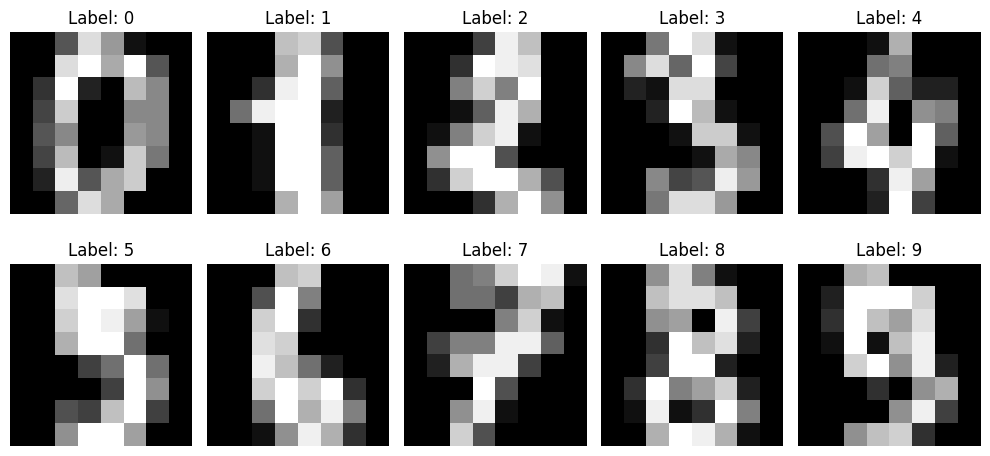

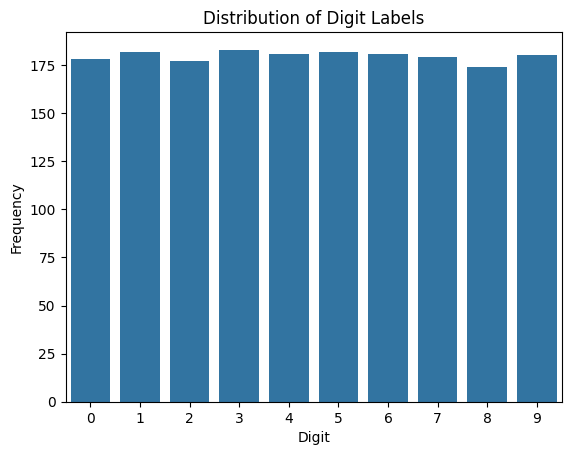

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load dataset
digits = load_digits()
X = digits.data  # Flattened image data
y = digits.target  # Labels (for exploration only)

# Normalize data
X = X / 16.0  # pixel values range from 0–16

# Shape
print(f'Data shape: {X.shape}')
print(f'Label shape: {y.shape}')

# Visualize some images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Distribution of labels
sns.countplot(x=y)
plt.title("Distribution of Digit Labels")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.show()

## Task 2: Clustering with K-Means

Now we'll apply the **K-Means** clustering algorithm to identify groups within the dataset. We'll use the **elbow method** to determine the optimal number of clusters and visualize cluster centroids.

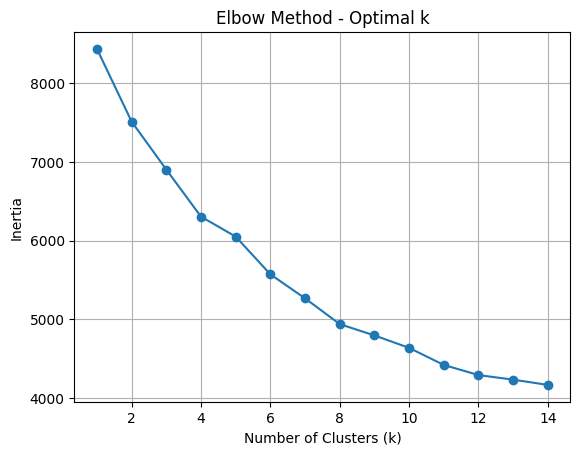

Silhouette Score for k=10: 0.1765


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine optimal k using elbow method
inertia = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Choose k=10 and fit KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Silhouette score
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score for k=10: {sil_score:.4f}")

## Task 3: Model Evaluation and Prediction

We will use the trained K-Means model to:

- Assign cluster labels to image data
- Compare these labels with true digit labels
- Visualize how well the clusters match with known digits

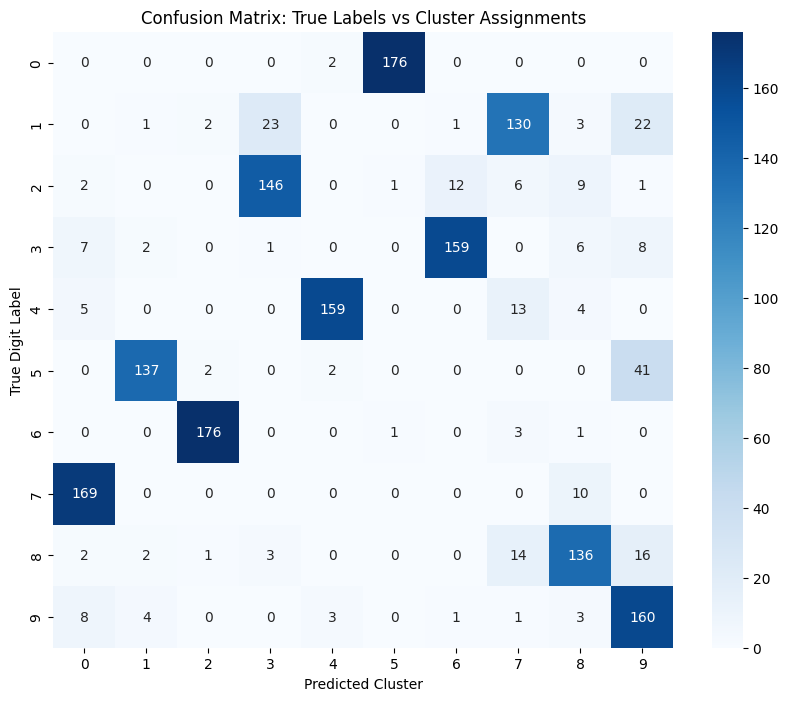

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compare predicted cluster vs true label
conf_mat = confusion_matrix(y, cluster_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Cluster")
plt.ylabel("True Digit Label")
plt.title("Confusion Matrix: True Labels vs Cluster Assignments")
plt.show()

## Task 4: Dimensionality Reduction and Visualization

We'll apply **Principal Component Analysis (PCA)** and **t-Distributed Stochastic Neighbor Embedding (t-SNE)** to reduce the dataset to 2 dimensions, allowing us to visualize the clustering result in 2D space.

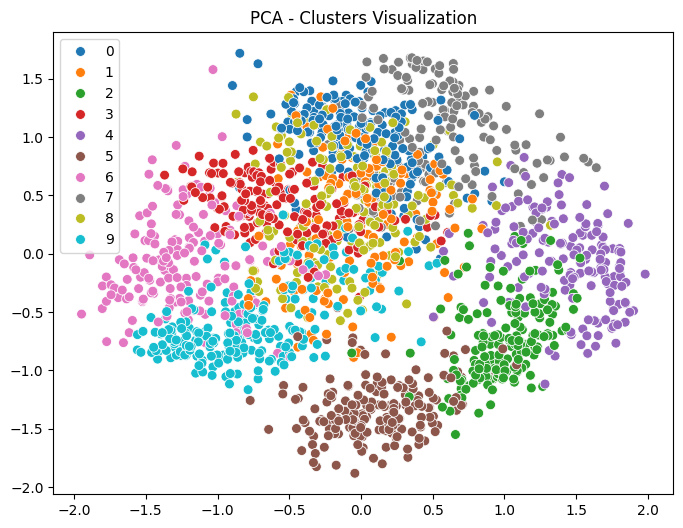

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


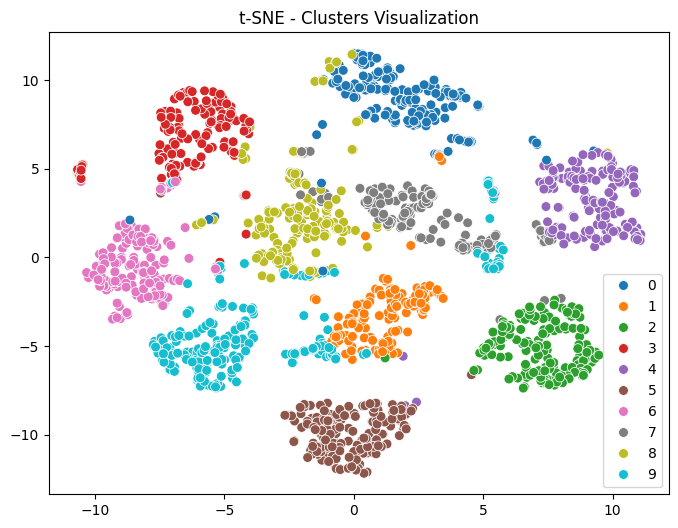

In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Reduce with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='tab10', legend='full', s=50)
plt.title("PCA - Clusters Visualization")
plt.show()

# Reduce with t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=cluster_labels, palette='tab10', legend='full', s=50)
plt.title("t-SNE - Clusters Visualization")
plt.show()

## Task 5: Conclusion and Insights Gathered

In this project, we applied unsupervised learning techniques to the MNIST dataset to uncover natural groupings within handwritten digit images. Our approach involved:

- **Preprocessing and exploring** the dataset to understand its structure and label distribution.
- **Applying K-Means clustering** to identify inherent patterns without using the labels.
- **Determining the optimal number of clusters** using the elbow method and validating results with the silhouette score.
- **Visualizing cluster assignments** using dimensionality reduction techniques like PCA and t-SNE.
- **Evaluating cluster quality** by comparing predicted cluster labels with actual digit labels.

### Key Insights:

- **Unsupervised learning can meaningfully cluster image data**, even without access to true labels.
- The **K-Means algorithm was able to discover structure** in the digit images, grouping similar digits together based on pixel intensities.
- **Dimensionality reduction techniques** such as PCA and t-SNE made it possible to visually assess the separation between clusters, showing clear groupings in two-dimensional space.
- Although K-Means is a simple algorithm, it can serve as a **powerful exploratory tool** for high-dimensional datasets like images.
- There is **some overlap and confusion between visually similar digits** (e.g., 1 and 7, 3 and 8), which suggests potential improvements with more advanced clustering methods or feature engineering.

This project illustrates how **unsupervised techniques** can uncover structure in data and provide a foundation for further analysis or semi-supervised learning approaches.